In [114]:
import pdfplumber, nltk
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np

In [3]:
pdf = pdfplumber.open(r'WEF_New_Physics_of_Financial_Services.pdf')

In [4]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\n', gaps=True)

In [110]:
page = pdf.pages[8]
contents = page.extract_text()
#print(contents)
sents = tokenizer.tokenize(contents)
print(sents)

['Context and approach | History of AI', 'Unlike past ‘AI Springs’, the science and practice of AI appears poised to ', 'continue an unprecedented multi-decade run of advancement ', 'AI development over time1', 'Mainframes Semiconductor microprocessors Big data Cloud storage and processing  “Internet of Things”', '1953 –IBM unveils the IBM 701 “Defense  1971 –Intel launches the Intel 4004 chip, known  1998 –John Mashey popularizes the term “big  2006 –Amazon Web Services (AWS) launches5 2008–2009 –More “things or objects” than people ', 'Calculator” mainframe2 as the first commercially available microprocessor3 data”4 are now connected to the internet6', 'Science fiction AI spring AI winter AI spring AI winter AI spring', '1950s 1960s 1970s 1980s 1990s 2000s 2010 –Present', '− Alan Turing publishes  − With funding from sources  − Lack of computing  − John Hopfield and David  − Chess grand master Garry  − Stanford robot wins the  − 2011 –Apple releases Siri, ', 'Computing Machinery and 

In [112]:
contents

'Context and approach | History of AI\nUnlike past ‘AI Springs’, the science and practice of AI appears poised to \ncontinue an unprecedented multi-decade run of advancement \nAI development over time1\nMainframes Semiconductor microprocessors Big data Cloud storage and processing  “Internet of Things”\n1953 –IBM unveils the IBM 701 “Defense  1971 –Intel launches the Intel 4004 chip, known  1998 –John Mashey popularizes the term “big  2006 –Amazon Web Services (AWS) launches5 2008–2009 –More “things or objects” than people \nCalculator” mainframe2 as the first commercially available microprocessor3 data”4 are now connected to the internet6\nScience fiction AI spring AI winter AI spring AI winter AI spring\n1950s 1960s 1970s 1980s 1990s 2000s 2010 –Present\n− Alan Turing publishes  − With funding from sources  − Lack of computing  − John Hopfield and David  − Chess grand master Garry  − Stanford robot wins the  − 2011 –Apple releases Siri, \nComputing Machinery and  such as DARPA,  powe

In [120]:
for idx in range(0, len(page.chars)):
    page.chars[idx]['id'] = idx

In [256]:
df = pd.DataFrame(page.chars)
df.drop(columns='object_type', axis=1, inplace=True)
#df.set_index('id', inplace=True)
numeric_cols = list(set(df.columns) - {'fontname', 'object_type', 'text'})
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df.head()

,adv,bottom,doctop,fontname,height,id,page_number,size,text,top,upright,width,x0,x1,y0,y1
0,4.912,530.36,4842.819,ArialMT,7.542,0,9,7.542,T,522.819,1,4.912,795.670,800.582,9.64,17.181
1,4.470,530.36,4842.819,ArialMT,7.542,1,9,7.542,h,522.819,1,4.470,800.582,805.053,9.64,17.181
2,4.470,530.36,4842.819,ArialMT,7.542,2,9,7.542,e,522.819,1,4.470,805.053,809.523,9.64,17.181
3,2.235,530.36,4842.819,ArialMT,7.542,3,9,7.542,,522.819,1,2.235,809.467,811.702,9.64,17.181
4,5.805,530.36,4842.819,ArialMT,7.542,4,9,7.542,N,522.819,1,5.805,811.742,817.547,9.64,17.181


In [108]:
#df = df.sort_values(by=['y0','x0'], ascending=[False,True])

In [130]:
pd.set_option('display.max_colwidth', -1)
df.pivot_table(index='y0', values='text', aggfunc=np.sum).head()

,text
y0,
9.640,The New Physics of Financial Services | 8
27.548,areas in which AI can be used
39.548,reinforcement learning and other simulation-based modelling techniques are opening up new improve profitability
51.572,"•Unstructured learning: In the pursuit of general intelligence, advancements in requirements, are betting heavily on AI, demonstrating the belief that these technologies will"
63.572,"•Leadership and investment:Big technology firms, with immediate-term profitability"


In [343]:
lines = df.groupby(by='y0')
temp = None

for group in lines.groups:    
    #line = df.iloc[lines.groups.get_group(group)].sort_values(by='x0')
    line = lines.get_group(group).sort_values(by='x0')
    #print(line.text.str.cat())
    
    # Break fragments in a line
    median_charwidth=np.median(line['width'])
    line['gap_next'] = line['x0'].shift(-1) - line['x1']
    line['breaks'] = np.NaN
    breaks_idx = line['gap_next']>median_charwidth
    line.loc[breaks_idx, 'breaks'] = line.loc[breaks_idx, 'breaks'].index
    line['breaks'].fillna(method='backfill', inplace=True)
    line['breaks'].fillna(value=1e6, inplace=True)
    
    temp2 = None
    print('>>>> line: {}'.format(line.text.str.cat()))
    line_fragments = line.groupby(by='breaks')    
    for frag_group in line_fragments.groups:
        line_fragment = line_fragments.get_group(frag_group) #.sort_values(by='x0')
        print('[{}]'.format(line_fragment.text.str.cat()))
        
        if "myriadsuccessful" in (line_fragment.text.str.cat()):
            temp2 = line_fragment
        
        
    # DEBUG: See samples cases - exit loop if there are n breaks.
    if (len(line[breaks_idx])==3) or temp2 is not None:
        temp = line
        break
    
    

>>>> line: The New Physics of Financial Services | 8
[The New Physics of Financial Services | 8]
>>>> line: areas in which AI can be used
[areas in which AI can be used]
>>>> line: improve profitabilityreinforcement learning and other simulation-based modelling techniques are opening up new 
[improve profitability]
[reinforcement learning and other simulation-based modelling techniques are opening up new ]
>>>> line: requirements, are betting heavily on AI, demonstrating the belief that these technologies will •Unstructured learning: In the pursuit of general intelligence, advancements in 
[•]
[requirements, are betting heavily on AI, demonstrating the belief that these technologies will ]
[Unstructured learning: In the pursuit of general intelligence, advancements in ]
>>>> line: •Leadership and investment:Big technology firms, with immediate-term profitability 
[•]
[Leadership and investment:Big technology firms, with immediate-term profitability ]
>>>> line: efficiency of these algo

In [375]:
temp2[2:80]

,adv,bottom,doctop,fontname,height,id,page_number,size,text,top,upright,width,x0,x1,y0,y1,gap_next,breaks
2337,3.317,458.428,4769.085,ArialMT,9.342,2337,9,9.342,r,449.085,1,3.317,46.134,49.451,81.572,90.915,0.000,2410.0
2338,2.769,458.428,4769.085,ArialMT,9.342,2338,9,9.342,,449.085,1,2.769,49.451,52.220,81.572,90.915,-0.100,2410.0
2339,2.769,458.428,4769.085,ArialMT,9.342,2339,9,9.342,t,449.085,1,2.769,52.120,54.889,81.572,90.915,0.000,2410.0
2340,5.538,458.428,4769.085,ArialMT,9.342,2340,9,9.342,h,449.085,1,5.538,54.889,60.427,81.572,90.915,0.000,2410.0
2341,5.538,458.428,4769.085,ArialMT,9.342,2341,9,9.342,e,449.085,1,5.538,60.427,65.965,81.572,90.915,-0.040,2410.0
2342,2.769,458.428,4769.085,ArialMT,9.342,2342,9,9.342,,449.085,1,2.769,65.925,68.694,81.572,90.915,-0.130,2410.0
2343,3.317,458.428,4769.085,ArialMT,9.342,2343,9,9.342,r,449.085,1,3.317,68.564,71.881,81.572,90.915,0.030,2410.0
2344,5.538,458.428,4769.085,ArialMT,9.342,2344,9,9.342,e,449.085,1,5.538,71.911,77.448,81.572,90.915,0.000,2410.0
2345,5.538,458.428,4769.085,ArialMT,9.342,2345,9,9.342,a,449.085,1,5.538,77.448,82.986,81.572,90.915,-0.040,2410.0
2346,2.211,458.428,4769.085,ArialMT,9.342,2346,9,9.342,l,449.085,1,2.211,82.946,85.158,81.572,90.915,-0.050,2410.0


In [320]:
temp2.loc[temp2.tail(1).index, 'gap_next'] = 0.0
max_space_width = np.max(temp2[temp2.text == ' '].gap_next)

In [377]:
temp2[(temp2['gap_next']>max_space_width)]

,adv,bottom,doctop,fontname,height,id,page_number,size,text,top,upright,width,x0,x1,y0,y1,gap_next,breaks
2371,5.538,458.428,4769.085,ArialMT,9.342,2371,9,9.342,d,449.085,1,5.538,187.383,192.92,81.572,90.915,2.99,2410.0


In [220]:
g1 = list(lines.groups[51.572])
df.iloc[list(g1)].sort_values(by='x0').text.str.cat()

line=df.iloc[list(g1)].sort_values(by='x0')

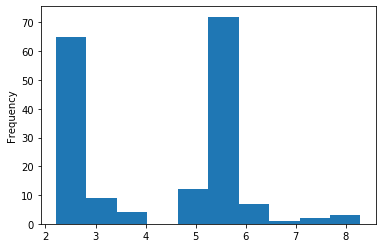

In [221]:
line.width.plot('hist')

In [222]:
line.width.describe()

count    175.000000
mean     4.350617  
std      1.532321  
min      2.211000  
25%      2.769000  
50%      4.980000  
75%      5.538000  
max      8.297000  
Name: width, dtype: float64

In [223]:
median_charwidth = np.median(line.width)

In [224]:
line['gap_next'] = (line['x0'].shift(-1) - line['x1'])>median_charwidth

In [230]:
list(line.loc[line['gap_next']==True].index)

[2588, 1811]

In [208]:
line.text.str.cat()

'The New Physics of Financial Services | 8'